PyCitySchools Panda Challenge 4
Key Takeaways

•	The key to a successful school and an unsuccessful school is math performance. Districtwide, success is determined by a passing percentage (>70%) of students in both math and reading. Independently, the district has a high percentage of students passing reading, 82.97%, but the percentage of students passing math is borderline, 72.39%.  Which leads to the overall passing student’s percentage of 65.17%. There are students that are strong readers but not strong mathematicians. That’s the key to improving district performance.
•	The top performing schools in the district are all charter schools. These schools are Cabrera, Thomas, Griffin, Wilson, & Pena. The lowest performing schools are all district schools, these are: Johnson, Hernandez, Huang, Figueroa, and Rodriguez. While the top schools have an overall passing % of students in the low 90s, the bottom performing schools have an overall passing % in the low 50s. The low performing schools have average reading success, but below average passing math percentages.
•	The spending level per student is not determinative of school performance. The top five performing schools, all charters, have spending levels that range from low to high. The best performing school has a spending level that is low compared to the rest of the district. The poorest performing schools all have high spending compared to the rest of the district.
•	School size appears to be a key factor in school performance. There are 15 high schools in the district. The top 8 schools are all either small or below the mean in size. The bottom 7 schools are all above the mean or larger in size. There is a similar division by charter and district schools. Which leads to a broad conclusion, the smaller charter schools outperform the larger district schools more efficiently because they use less spending per student. Whether it is more selective enrollment or higher parental engagement, the charter schools are the primary reason the district is performing as well as it is. 
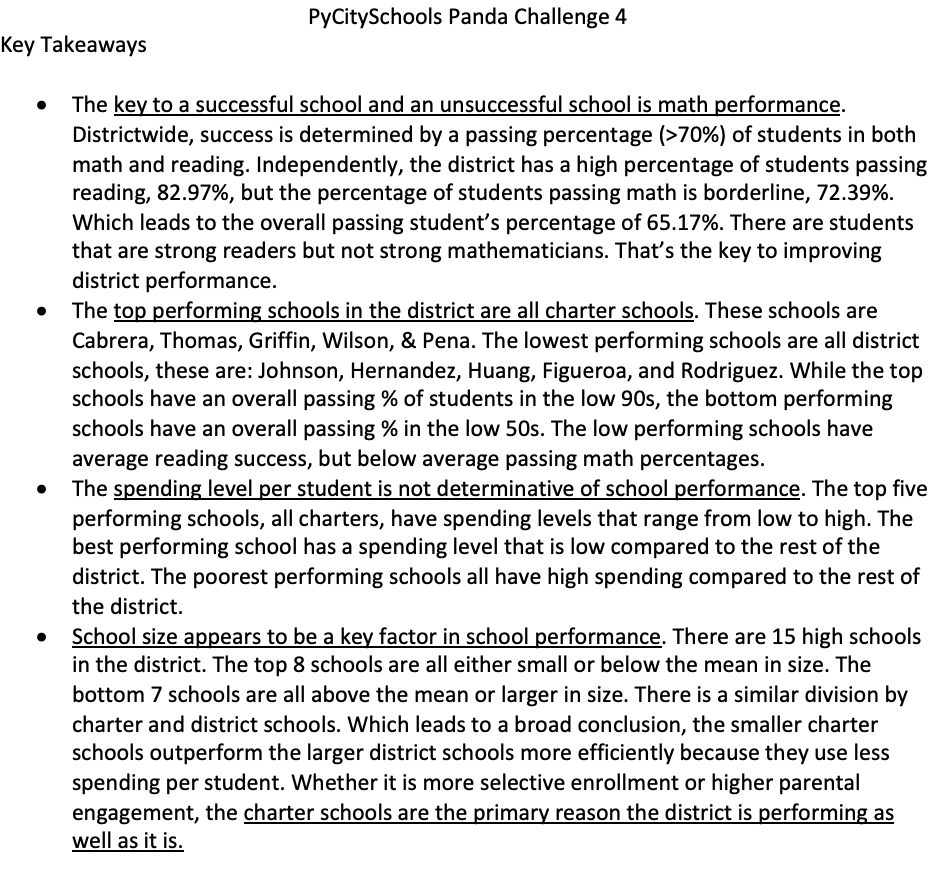

In [1]:
import pandas as pd


In [2]:
# locate source csv
schools_complete_csv = "Resources/schools_complete.csv"
students_complete_csv = "Resources/students_complete.csv"


In [3]:
# import csv as data frames
schools_complete_df = pd.read_csv(schools_complete_csv)
students_complete_df = pd.read_csv(students_complete_csv)

In [4]:
# see the df
schools_complete_df.head()

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [5]:
#see the df
students_complete_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [6]:
#merge the two df into one master column based on school name 
schooldatacomplete_df = pd.merge(schools_complete_df, students_complete_df, how="left", on=["school_name", "school_name"])
schooldatacomplete_df.head()


,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60
3,0,Huang High School,District,2917,1910635,3,Dr. Richard Scott,M,12th,67,58
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84


In [7]:
# District Summary
totalschoolcount = len(schooldatacomplete_df["school_name"].unique())
totalstudentcount=schooldatacomplete_df["Student ID"].count()
totalbudgetcount=schools_complete_df["budget"].sum()
avgmath=schooldatacomplete_df["math_score"].mean()
avgreading=schooldatacomplete_df["reading_score"].mean()



print ("Total Schools_$",totalschoolcount)
print ("Total Students_$",totalstudentcount)
print ("Total Budget_$",totalbudgetcount)
print ("Average Math Score",avgmath)
print ("Average Reading Score",avgreading)

Total Schools_$ 15
Total Students_$ 39170
Total Budget_$ 24649428
Average Math Score 78.98537145774827
Average Reading Score 81.87784018381414


In [8]:
# Percent passing reading, passing is 70%
passread=schooldatacomplete_df[(schooldatacomplete_df["reading_score"]>70)]
passread

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84
5,0,Huang High School,District,2917,1910635,5,Bryan Miranda,M,9th,94,94
6,0,Huang High School,District,2917,1910635,6,Sheena Carter,F,11th,82,80
...,...,...,...,...,...,...,...,...,...,...,...
39165,14,Thomas High School,Charter,1635,1043130,39165,Donna Howard,F,12th,99,90
39166,14,Thomas High School,Charter,1635,1043130,39166,Dawn Bell,F,10th,95,70
39167,14,Thomas High School,Charter,1635,1043130,39167,Rebecca Tanner,F,9th,73,84
39168,14,Thomas High School,Charter,1635,1043130,39168,Desiree Kidd,F,10th,99,90


In [9]:
passread_count=passread["student_name"].count()
passreadpercent= passread_count/totalstudentcount *100
print(round(passreadpercent,2))

82.97


In [10]:
# Percent passing math, reading, and jointly, passing is 70% or greater
passmath=schooldatacomplete_df[(schooldatacomplete_df["math_score"]>70)]
passmath

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84
5,0,Huang High School,District,2917,1910635,5,Bryan Miranda,M,9th,94,94
6,0,Huang High School,District,2917,1910635,6,Sheena Carter,F,11th,82,80
8,0,Huang High School,District,2917,1910635,8,Michael Roth,M,10th,95,87
...,...,...,...,...,...,...,...,...,...,...,...
39164,14,Thomas High School,Charter,1635,1043130,39164,Joseph Anthony,M,9th,97,76
39165,14,Thomas High School,Charter,1635,1043130,39165,Donna Howard,F,12th,99,90
39167,14,Thomas High School,Charter,1635,1043130,39167,Rebecca Tanner,F,9th,73,84
39168,14,Thomas High School,Charter,1635,1043130,39168,Desiree Kidd,F,10th,99,90


In [11]:
passmath_count=passmath["student_name"].count()
passmathpercent= passmath_count/totalstudentcount *100
print(round(passmathpercent,2))

72.39


In [12]:
passingboth = schooldatacomplete_df[(schooldatacomplete_df["math_score"]>=70) & (schooldatacomplete_df["reading_score"]>=70)]
passingbothcount=passingboth["student_name"].count()
passingbothpercent= passingbothcount/totalstudentcount *100
print(round(passingbothpercent,2))


65.17


In [13]:
# District Summary
# schooldatacomplete_df
distsum_df=pd.DataFrame([
    {"Total School":totalschoolcount,
    "Total Students":totalstudentcount,
    "Total Budget": totalbudgetcount,
     "Average Math Score": avgmath,
     "Average Reading Score": avgreading,
     "Percentage of Passing Math": passmathpercent,
     "Percentage of Passing Reading": passreadpercent,
     "Percent of Passing Overall": passingbothpercent,
    }])
distsum_df

,Total School,Total Students,Total Budget,Average Math Score,Average Reading Score,Percentage of Passing Math,Percentage of Passing Reading,Percent of Passing Overall
0,15,39170,24649428,78.985371,81.87784,72.392137,82.971662,65.172326


In [14]:
# START SCHOOL SUMMARY
# A DF SUMMARIZING METRICS ABOUT EACH SCHOOL
schooldatacomplete_df.columns

Index(['School ID', 'school_name', 'type', 'size', 'budget', 'Student ID',
       'student_name', 'gender', 'grade', 'reading_score', 'math_score'],
      dtype='object')

In [24]:
# Decided to start with original school dataframe and add to it
schoolsum_df =schools_complete_df
schoolsum_df


,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [16]:
schoolsum_df = schools_complete_df.set_index("school_name")
schoolsum_df.head()


,School ID,type,size,budget
school_name,,,,
Huang High School,0,District,2917,1910635
Figueroa High School,1,District,2949,1884411
Shelton High School,2,Charter,1761,1056600
Hernandez High School,3,District,4635,3022020
Griffin High School,4,Charter,1468,917500


In [17]:
# schoolsum_df = schoolsum_df.rename(columns={"school_name":"School Name", "type": "Type", "size" :"Student Pop.", "budget": "Budget"})
# schoolsum_df.head()
# RENAME INDEX?

In [29]:
schoolsum_df["Per Student Budget"]= schoolsum_df["budget"]/schoolsum_df["size"]
schoolsum_df

,School ID,school_name,type,size,budget,Per Student Budget
0,0,Huang High School,District,2917,1910635,655.0
1,1,Figueroa High School,District,2949,1884411,639.0
2,2,Shelton High School,Charter,1761,1056600,600.0
3,3,Hernandez High School,District,4635,3022020,652.0
4,4,Griffin High School,Charter,1468,917500,625.0
5,5,Wilson High School,Charter,2283,1319574,578.0
6,6,Cabrera High School,Charter,1858,1081356,582.0
7,7,Bailey High School,District,4976,3124928,628.0
8,8,Holden High School,Charter,427,248087,581.0
9,9,Pena High School,Charter,962,585858,609.0


In [37]:
#Get the avg math score for each unique row from the schoolscomplete_df
#sum up the total math scores by school name/row
# every unique school name, add the math score and create a total math score for the whole scool
# divide the total math scores by the student pop of each school 



schoolsumgroup_df= schooldatacomplete_df.groupby(["school_name"])[["math_score","reading_score"]].mean()
schoolsumgroup_df.reset_index(inplace=True)
schoolsumgroup_df


,school_name,math_score,reading_score
0,Bailey High School,77.048432,81.033963
1,Cabrera High School,83.061895,83.975780
2,Figueroa High School,76.711767,81.158020
3,Ford High School,77.102592,80.746258
4,Griffin High School,83.351499,83.816757
5,Hernandez High School,77.289752,80.934412
6,Holden High School,83.803279,83.814988
7,Huang High School,76.629414,81.182722
8,Johnson High School,77.072464,80.966394
9,Pena High School,83.839917,84.044699


In [38]:
# merge to the right
schoolsummz_df = pd.merge(schoolsum_df,schoolsumgroup_df,on="school_name")
schoolsummz_df

,School ID,school_name,type,size,budget,Per Student Budget,math_score,reading_score
0,0,Huang High School,District,2917,1910635,655.0,76.629414,81.182722
1,1,Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020
2,2,Shelton High School,Charter,1761,1056600,600.0,83.359455,83.725724
3,3,Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412
4,4,Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757
5,5,Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488
6,6,Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780
7,7,Bailey High School,District,4976,3124928,628.0,77.048432,81.033963
8,8,Holden High School,Charter,427,248087,581.0,83.803279,83.814988
9,9,Pena High School,Charter,962,585858,609.0,83.839917,84.044699


In [47]:
schoolsummz_df.set_index("school_name",inplace=True)

In [197]:
# Passing Math and Reading %
# passmath_count=passmath["student_name"].count()
# passmathpercent= passmath_count/totalstudentcount *100
# print(round(passmathpercent,2))

schoolpassinggroup_df = schooldatacomplete_df.groupby(["school_name"])["math_score"].mean()
schoolpassinggroup_df

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [199]:
# Get the total number of students taking math for each school using a groupby and mean()
schoolsumpercentmath_df= schooldatacomplete_df.groupby(["school_name"])["math_score"]
mathavg_df=schoolsumpercentmath_df.mean()
mathavg_df

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64


In [201]:
schoolsumpercentread_df= schooldatacomplete_df.groupby(["School ID"])["reading_score"]
readingavg_df=schoolsumpercentread_df.mean()
readingavg_df

School ID
0     81.182722
1     81.158020
2     83.725724
3     80.934412
4     83.816757
5     83.989488
6     83.975780
7     81.033963
8     83.814988
9     84.044699
10    83.955000
11    80.744686
12    80.966394
13    80.746258
14    83.848930
Name: reading_score, dtype: float64

In [198]:
# Get the total number of students taking math for each school using a groupby and mean()
# By filter, I mean either using this  filtered_df = df[(df['colname'] >=condition)]['school name']
schoolsummathfilter_df= schooldatacomplete_df[(schooldatacomplete_df["math_score"] >= 70)].groupby(["school_name"]).count()["student_name"]/schoolsummz_df["size"]*100
schoolsummathfilter_df




school_name
Bailey High School       66.680064
Cabrera High School      94.133477
Figueroa High School     65.988471
Ford High School         68.309602
Griffin High School      93.392371
Hernandez High School    66.752967
Holden High School       92.505855
Huang High School        65.683922
Johnson High School      66.057551
Pena High School         94.594595
Rodriguez High School    66.366592
Shelton High School      93.867121
Thomas High School       93.272171
Wilson High School       93.867718
Wright High School       93.333333
dtype: float64

In [50]:
schoolsumreadfilter_df= schooldatacomplete_df[(schooldatacomplete_df["reading_score"] >= 70)].groupby(["school_name"]).count()["student_name"]/schoolsummz_df["size"]*100
schoolsumreadfilter_df

school_name
Bailey High School       81.933280
Cabrera High School      97.039828
Figueroa High School     80.739234
Ford High School         79.299014
Griffin High School      97.138965
Hernandez High School    80.862999
Holden High School       96.252927
Huang High School        81.316421
Johnson High School      81.222432
Pena High School         95.945946
Rodriguez High School    80.220055
Shelton High School      95.854628
Thomas High School       97.308869
Wilson High School       96.539641
Wright High School       96.611111
dtype: float64


In [52]:
schoolsumoverallfilter_df= schooldatacomplete_df[(schooldatacomplete_df["math_score"] >= 70)&(schooldatacomplete_df["reading_score"] >= 70)].groupby(["school_name"]).count()["student_name"]/schoolsummz_df["size"]*100
schoolsumoverallfilter_df

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64


In [57]:
schoolsummathfilter_df= schoolsummathfilter_df.rename("%passing math")
schoolsummzmath_df=pd.merge(schoolsummz_df, schoolsummathfilter_df, left_index=True, right_index=True)
schoolsumreadfilter_df= schoolsumreadfilter_df.rename("%passing reading")
schoolsummzmathread_df=pd.merge(schoolsummzmath_df, schoolsumreadfilter_df, left_index=True, right_index=True)
schoolsumoverallfilter_df= schoolsumoverallfilter_df.rename("%passing overall")
schoolsummzoverall_df=pd.merge(schoolsummzmathread_df, schoolsumoverallfilter_df, left_index=True, right_index=True)
schoolsummzoverall_df

,School ID,type,size,budget,Per Student Budget,math_score,reading_score,%passing math,%passing reading,%passing overall
school_name,,,,,,,,,,
Huang High School,0,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Figueroa High School,1,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Shelton High School,2,Charter,1761,1056600,600.0,83.359455,83.725724,93.867121,95.854628,89.892107
Hernandez High School,3,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Griffin High School,4,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,5,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Cabrera High School,6,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Bailey High School,7,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Holden High School,8,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,89.227166


In [58]:
del schoolsummzoverall_df["School ID"]
schoolsummzoverall_df

,type,size,budget,Per Student Budget,math_score,reading_score,%passing math,%passing reading,%passing overall
school_name,,,,,,,,,
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Shelton High School,Charter,1761,1056600,600.0,83.359455,83.725724,93.867121,95.854628,89.892107
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,89.227166


In [62]:
#SORT ASCENDING BASED ON OVERALL PASSING
schoolsummaryoverall_df = schoolsummzoverall_df.sort_values(["%passing overall"], ascending=False)

In [63]:
#HIGHEST PERFORMING SCHOOLS
schoolsummaryoverall_df.head()

,type,size,budget,Per Student Budget,math_score,reading_score,%passing math,%passing reading,%passing overall
school_name,,,,,,,,,
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,90.540541


In [64]:
#LOWEST PERFORMING SCHOOLS
schoolsummaryoverall_df.tail()


,type,size,budget,Per Student Budget,math_score,reading_score,%passing math,%passing reading,%passing overall
school_name,,,,,,,,,
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,53.539172
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Rodriguez High School,District,3999,2547363,637.0,76.842711,80.744686,66.366592,80.220055,52.988247


In [ ]:
#MATH SCORES BY GRADE BINNING
# sort by grade level and then mean the math scores
# https://stackoverflow.com/questions/36518027/pandas-creating-new-data-frame-from-only-certain-columns
# csv2 = csv1[['Acceleration', 'Pressure']].copy()

In [82]:
schooldatacomplete_df.columns


Index(['School ID', 'school_name', 'type', 'size', 'budget', 'Student ID',
       'student_name', 'gender', 'grade', 'reading_score', 'math_score'],
      dtype='object')

In [164]:
gradesortm_df= schooldatacomplete_df[["school_name","grade","math_score"]]
gradesortm_df.shape

(39170, 3)

In [204]:
gradesortmschool_df=gradesortm_df.groupby("school_name")
gradesortmschool_df


In [203]:
#MATH SCORES BY GRADE 'BINNING'
# COULD WE SORT GRADE LEVELS BETTER?
# why no tiger stripes?
gradesortm_df=schooldatacomplete_df[["school_name","grade","math_score"]]
gradesortm_df=gradesortm_df.groupby(["school_name","grade"]).mean()

gradesortm_df

math_score
school_name           grade            
Bailey High School    10th    76.996772
                      11th    77.515588
                      12th    76.492218
                      9th     77.083676
Cabrera High School   10th    83.154506
                      11th    82.765560
                      12th    83.277487
                      9th     83.094697
Figueroa High School  10th    76.539974
                      11th    76.884344
                      12th    77.151369
                      9th     76.403037
Ford High School      10th    77.672316
                      11th    76.918058
                      12th    76.179963
                      9th     77.361345
Griffin High School   10th    84.229064
                      11th    83.842105
                      12th    83.356164
                      9th     82.044010
Hernandez High School 10th    77.337408
                      11th    77.136029
                      12th    77.186567
                      9th     77.438495
Holden High School    10th    83.429825
                      11th    85.000000
                      12th    82.855422
                      9th     83.787402
Huang High School     10th    75.908735
                      11th    76.446602
                      12th    77.225641
                      9th     77.027251
Johnson High School   10th    76.691117
                      11th    77.491653
                      12th    76.863248
                      9th     77.187857
Pena High School      10th    83.372000
                      11th    84.328125
                      12th    84.121547
                      9th     83.625455
Rodriguez High School 10th    76.612500
                      11th    76.395626
                      12th    77.690748
                      9th     76.859966
Shelton High School   10th    82.917411
                      11th    83.383495
                      12th    83.778976
                      9th     83.420755
Thomas High School    10th    83.087886
                      11th    83.498795
                      12th    83.497041
                      9th     83.590022
Wilson High School    10th    83.724422
                      11th    83.195326
                      12th    83.035794
                      9th     83.085578
Wright High School    10th    84.010288
                      11th    83.836782
                      12th    83.644986
                      9th     83.264706

In [173]:
# READING SCORES BY GRADE 'BINNING'
gradesortr_df= schooldatacomplete_df[["school_name","grade","reading_score"]]
# gradesortr_df.head()
# gradesortr_df.shape
gradesortr_df=gradesortr_df.groupby(["school_name","grade"]).mean()

gradesortr_df


reading_score
school_name           grade               
Bailey High School    10th       80.907183
                      11th       80.945643
                      12th       80.912451
                      9th        81.303155
Cabrera High School   10th       84.253219
                      11th       83.788382
                      12th       84.287958
                      9th        83.676136
Figueroa High School  10th       81.408912
                      11th       80.640339
                      12th       81.384863
                      9th        81.198598
Ford High School      10th       81.262712
                      11th       80.403642
                      12th       80.662338
                      9th        80.632653
Griffin High School   10th       83.706897
                      11th       84.288089
                      12th       84.013699
                      9th        83.369193
Hernandez High School 10th       80.660147
                      11th       81.396140
                      12th       80.857143
                      9th        80.866860
Holden High School    10th       83.324561
                      11th       83.815534
                      12th       84.698795
                      9th        83.677165
Huang High School     10th       81.512386
                      11th       81.417476
                      12th       80.305983
                      9th        81.290284
Johnson High School   10th       80.773431
                      11th       80.616027
                      12th       81.227564
                      9th        81.260714
Pena High School      10th       83.612000
                      11th       84.335938
                      12th       84.591160
                      9th        83.807273
Rodriguez High School 10th       80.629808
                      11th       80.864811
                      12th       80.376426
                      9th        80.993127
Shelton High School   10th       83.441964
                      11th       84.373786
                      12th       82.781671
                      9th        84.122642
Thomas High School    10th       84.254157
                      11th       83.585542
                      12th       83.831361
                      9th        83.728850
Wilson High School    10th       84.021452
                      11th       83.764608
                      12th       84.317673
                      9th        83.939778
Wright High School    10th       83.812757
                      11th       84.156322
                      12th       84.073171
                      9th        83.833333

In [120]:
# SCORES BY SPENDING
schoolsummaryoverall_df.columns


Index(['type', 'size', 'budget', 'Per Student Budget', 'math_score',
       'reading_score', '%passing math', '%passing reading',
       '%passing overall'],
      dtype='object')

In [182]:
spendingsort_df= schoolsummaryoverall_df[["Per Student Budget","math_score","reading_score", "%passing math","%passing reading","%passing overall"]]
spendingsort_df
                                                 
                                                 
                                                 
                                                 

,Per Student Budget,math_score,reading_score,%passing math,%passing reading,%passing overall
school_name,,,,,,
Cabrera High School,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,638.0,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,609.0,83.839917,84.044699,94.594595,95.945946,90.540541
Wright High School,583.0,83.682222,83.955000,93.333333,96.611111,90.333333
Shelton High School,600.0,83.359455,83.725724,93.867121,95.854628,89.892107
Holden High School,581.0,83.803279,83.814988,92.505855,96.252927,89.227166
Bailey High School,628.0,77.048432,81.033963,66.680064,81.933280,54.642283


In [184]:

spendingsort_df.columns

Index(['Per Student Budget', 'math_score', 'reading_score', '%passing math',
       '%passing reading', '%passing overall'],
      dtype='object')

In [192]:

bins =[575,594.9,614.9,634.9,655]
group_names=["Low","Mid-Low","Mid-High","High"]
spendingsort_df["Spending Level"] =pd.cut(spendingsort_df["Per Student Budget"], bins, labels=group_names, include_lowest=True)
spendingsort_df[["Per Student Budget", "Spending Level","%passing overall", "math_score", "reading_score", "%passing math", "%passing reading",]]



/var/folders/v0/fgqm4drj0fv_rywhmh177t240000gp/T/ipykernel_83772/3953820199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spendingsort_df["Spending Level"] =pd.cut(spendingsort_df["Per Student Budget"], bins, labels=group_names, include_lowest=True)


,Per Student Budget,Spending Level,%passing overall,math_score,reading_score,%passing math,%passing reading
school_name,,,,,,,
Cabrera High School,582.0,Low,91.334769,83.061895,83.975780,94.133477,97.039828
Thomas High School,638.0,High,90.948012,83.418349,83.848930,93.272171,97.308869
Griffin High School,625.0,Mid-High,90.599455,83.351499,83.816757,93.392371,97.138965
Wilson High School,578.0,Low,90.582567,83.274201,83.989488,93.867718,96.539641
Pena High School,609.0,Mid-Low,90.540541,83.839917,84.044699,94.594595,95.945946
Wright High School,583.0,Low,90.333333,83.682222,83.955000,93.333333,96.611111
Shelton High School,600.0,Mid-Low,89.892107,83.359455,83.725724,93.867121,95.854628
Holden High School,581.0,Low,89.227166,83.803279,83.814988,92.505855,96.252927
Bailey High School,628.0,Mid-High,54.642283,77.048432,81.033963,66.680064,81.933280


In [193]:
sizesort_df=schoolsummaryoverall_df[["size","math_score","reading_score","%passing math","%passing reading","%passing overall"]]
sizesort_df



,size,math_score,reading_score,%passing math,%passing reading,%passing overall
school_name,,,,,,
Cabrera High School,1858,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,1635,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,1468,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,2283,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,962,83.839917,84.044699,94.594595,95.945946,90.540541
Wright High School,1800,83.682222,83.955000,93.333333,96.611111,90.333333
Shelton High School,1761,83.359455,83.725724,93.867121,95.854628,89.892107
Holden High School,427,83.803279,83.814988,92.505855,96.252927,89.227166
Bailey High School,4976,77.048432,81.033963,66.680064,81.933280,54.642283


In [171]:
# SCHOOL SORT BY STUDENT POPULATION/SIZE
sizesort_df[["size"]].mean()
# gradesortr_df.groupby(["school_name","grade"]).mean()

size    2611.333333
dtype: float64

In [ ]:
sizesort

In [196]:
bins =[400,1500,2600,3700,5000]
group_names=["Small","Below Mean","Above Mean","Large"]
sizesort_df["School Size"] =pd.cut(sizesort_df["size"], bins, labels=group_names, include_lowest=True)
sizesort_df[["size","School Size","%passing overall", "math_score", "reading_score", "%passing math", "%passing reading",]]



/var/folders/v0/fgqm4drj0fv_rywhmh177t240000gp/T/ipykernel_83772/2218469548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizesort_df["School Size"] =pd.cut(sizesort_df["size"], bins, labels=group_names, include_lowest=True)


,size,School Size,%passing overall,math_score,reading_score,%passing math,%passing reading
school_name,,,,,,,
Cabrera High School,1858,Below Mean,91.334769,83.061895,83.975780,94.133477,97.039828
Thomas High School,1635,Below Mean,90.948012,83.418349,83.848930,93.272171,97.308869
Griffin High School,1468,Small,90.599455,83.351499,83.816757,93.392371,97.138965
Wilson High School,2283,Below Mean,90.582567,83.274201,83.989488,93.867718,96.539641
Pena High School,962,Small,90.540541,83.839917,84.044699,94.594595,95.945946
Wright High School,1800,Below Mean,90.333333,83.682222,83.955000,93.333333,96.611111
Shelton High School,1761,Below Mean,89.892107,83.359455,83.725724,93.867121,95.854628
Holden High School,427,Small,89.227166,83.803279,83.814988,92.505855,96.252927
Bailey High School,4976,Large,54.642283,77.048432,81.033963,66.680064,81.933280


In [183]:
# SCORES BY SCHOOL TYPE
typesort_df=schoolsummaryoverall_df[["type","%passing overall","%passing math","%passing reading","math_score","reading_score",]]
typesort_df

,type,%passing overall,%passing math,%passing reading,math_score,reading_score
school_name,,,,,,
Cabrera High School,Charter,91.334769,94.133477,97.039828,83.061895,83.975780
Thomas High School,Charter,90.948012,93.272171,97.308869,83.418349,83.848930
Griffin High School,Charter,90.599455,93.392371,97.138965,83.351499,83.816757
Wilson High School,Charter,90.582567,93.867718,96.539641,83.274201,83.989488
Pena High School,Charter,90.540541,94.594595,95.945946,83.839917,84.044699
Wright High School,Charter,90.333333,93.333333,96.611111,83.682222,83.955000
Shelton High School,Charter,89.892107,93.867121,95.854628,83.359455,83.725724
Holden High School,Charter,89.227166,92.505855,96.252927,83.803279,83.814988
Bailey High School,District,54.642283,66.680064,81.933280,77.048432,81.033963
